### IDs:
Insert yours IDs to the cell below

ID #1: 312119126

ID #2:


## Read the following instructions carefully:
1. This Jupyter notebook contains all the step-by-step instructions needed for this exercise.
1. Write **efficient**, **vectorized** code whenever possible. 
1. Some questions require you to write your functions and answers in this jupyter notebook only. For these questions, you are free to add cells to this notebook.
1. For the other questions, you need to complete the required functions in the `hw2.py` script only. Only the functions in the `hw2.py` script are tested for this type of question.
1. In the function signatures include parameters with default values only. (`def example(a=1, b=2):`).
1. Submission includes a **zip** file that contains the `hw2.py` script as well as this notebook, with your ID as the file name. For example, `hw2_123456789_987654321.zip` if you submitted in pairs and `hw2_123456789.zip` if you submitted the exercise alone.

### Question 1 - Data exploration and visialization - practical

Load California dataset from sklearn.
Explore the data. 
Follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of the HouseAge. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behavior?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the HouseAge variable and add two vertical lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 "interesting" trends in the data. No need to provide statistical confidence at this point.

In [50]:
import ssl
import pandas as pd
from sklearn.datasets import fetch_california_housing


ssl._create_default_https_context = ssl._create_unverified_context # skiped ssl verification
housing = fetch_california_housing()

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [51]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
print(df.dtypes)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object



1. The California housing dataset contains 20,640 samples and 8 features. Each variable in the dataset is of the data type `float64`.


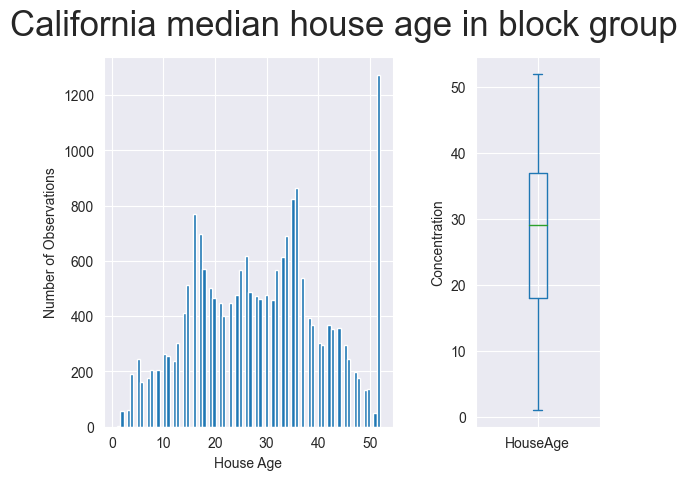

In [52]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1, 2, gridspec_kw={"width_ratios": (.7, .3)})
plt.subplots_adjust(wspace=0.4)

ax0 = df['HouseAge'].hist(bins=80, ax=axes[0])
ax1 = df['HouseAge'].plot.box(ax=axes[1])

figure.suptitle('California median house age in block group', fontsize=25)

ax0.set_ylabel("Number of Observations")
ax0.set_xlabel("House Age")
ax1.set_ylabel("Concentration")


plt.show()

2. The distribution is concentrated between 18 and 37 years, with smaller peaks around 15 and 35, and a significant peak around 50. The median value is approximately 30 years.

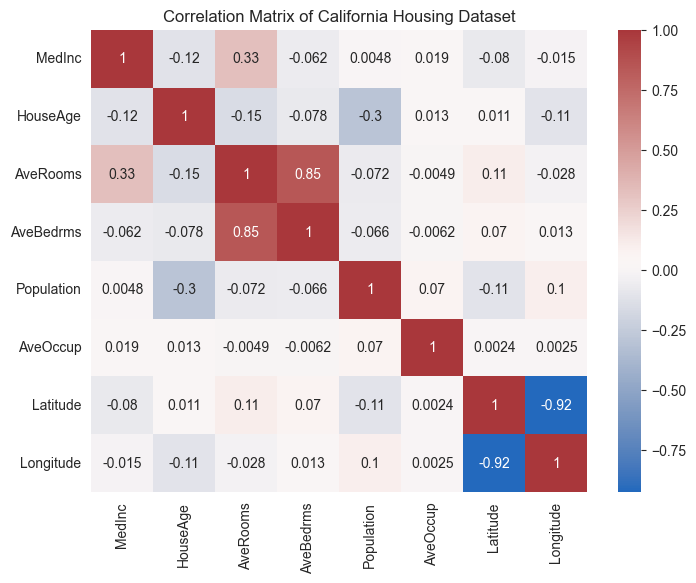

In [53]:
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='vlag')

plt.title('Correlation Matrix of California Housing Dataset')
plt.show()

3. The pairs [`AveRooms`, `AveBedrms`] and [`AveRooms`, `MedInc`] exhibit strong positive correlations, with correlation coefficients of 0.85 and 0.33, respectively. Additionally, the pair [`Latitude`, `Longitude`] shows a high negative correlation with a coefficient of -0.93, suggesting an underlying geographic relationship.
    The population feature is negatively correlated with house age, which is unusual because we would typically expect areas with larger populations to have older houses.

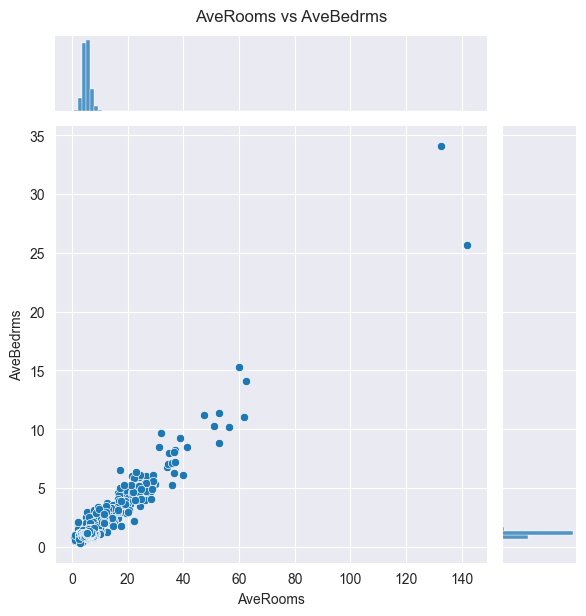

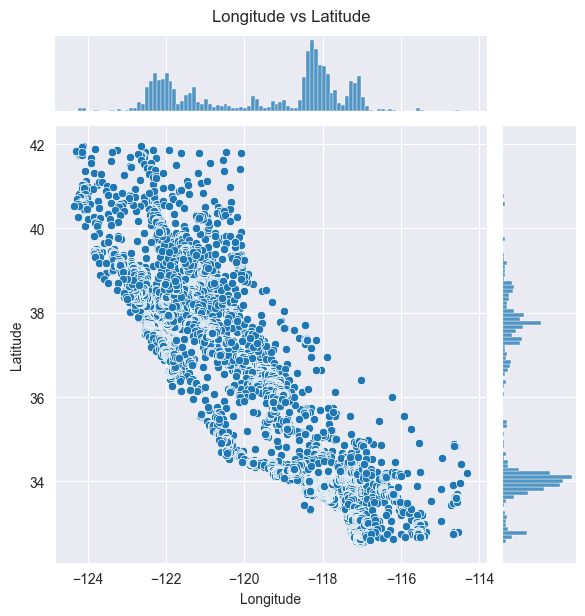

In [54]:
g1 = sns.jointplot(x='AveRooms', y='AveBedrms', data=df, kind='scatter', marginal_kws=dict(bins=100))
g1.fig.suptitle('AveRooms vs AveBedrms', y=1.02)

g2 = sns.jointplot(x='Longitude', y='Latitude', data=df, kind='scatter', marginal_kws=dict(bins=100, fill=True))
g2.fig.suptitle('Longitude vs Latitude', y=1.02)

plt.show()

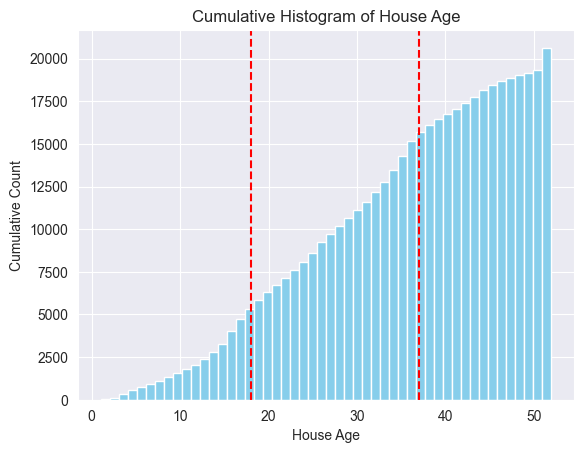

In [55]:
import numpy as np
q1 = np.percentile(df['HouseAge'], 25)
q3 = np.percentile(df['HouseAge'], 75)

plt.hist(df['HouseAge'], bins=50, cumulative=True, color='skyblue', label='Cumulative Histogram')

plt.axvline(q1, color='red', linestyle='dashed', linewidth=1.5, label='Q1 lower: {}'.format(q1))
plt.axvline(q3, color='red', linestyle='dashed', linewidth=1.5, label='Q3 upper: {}'.format(q3))


plt.title('Cumulative Histogram of House Age')
plt.xlabel('House Age')
plt.ylabel('Cumulative Count')

plt.show()

6. Two interesting trends in the data are:
 - Higher income levels are associated with more rooms in a house, indicating that wealthier individuals tend to have larger homes.
 - The peak in the house age distribution around 50 years suggests that a significant number of houses were built during that period, likely due to urban development or other external factors.

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectively.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

Complete the function `q2a` in `hw2.py` to answer this question.

In [63]:
from hw2 import q2a

q2a()

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Complete the function `q2b` in `hw2.py` to answer this question.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionally independent given $Z$?

Complete the function `q2c` in `hw2.py` to answer this question.

In [ ]:
from hw2 import q2c

q2c()

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution using Algebra.

Write your solution in a Markdown cell below

We will use the following equations to estimate the parameters of the GMD:

$$
E(X) = \sum_{i} w_i \cdot E(X_i) \\
\text{V}(X) = \sum_{i} w_i \cdot \text{V}(X_i) + \sum_{i} w_i \cdot (E(X_i) - E(X))^2 \\
1 = \sum_{i} w_i
$$

Lets denote the unknown parameters as $\mu_3, w_1, w_3$.

By the third equation and that $w_2 = 0.25$ we get $w_3 = 0.75 - w_1$.

By the data we get $E(X) = 12.2, V(X) = 17.59$
And we will use the known values to substitute in the first two equations:

$$
12.2 = w_1 \cdot 4 + 0.25 \cdot 9 + (0.75 - w_1) \cdot \mu_3
\implies
\mu_3 = \frac{9.95 - 4 \cdot w_1}{0.75 - w_1} \\
17.59 = w_1 \cdot 0.5^2 + 0.25 \cdot 0.5^2 + (0.75 - w_1) \cdot 1.5^2 + w_1 \cdot (4 - 12.2)^2 + 0.25 \cdot (9 - 12.2)^2 + (0.75 - w_1) \cdot (\mu_3 - 12.2)^2 \\

\text{After doing the calculations, we get: } \mu_3 \approx 15.1, \, w_1 \approx 0.123, \, w_3 \approx 0.627


$$










#### 3.B
Provide an estimate for the other parameters of the distribution using EM.

Your EM algorithm should support the fact that some of the parameter values are known in advance.

Complete the function `my_EM` in `hw2.py` to answer this question.

In [ ]:
from hw2 import my_EM

mus, sigmas, ws = my_EM(np.array([4, 9, 5]), np.array([0.5, 0.5, 1.5]), np.array([0.25, 0.25, 0.5]),
            known_params=[{'mu': 4, 'sigma': 0.5}, {'mu': 9, 'sigma': 0.5, 'w': 0.25}, {'sigma': 1.5}])

print('Estimation:')
for i, (mu, s,w) in enumerate(zip(mus, sigmas, ws)):
    print('{}: Mean: {:.2f}, Standard deviation: {:.2f}, Weight: {:.2f}'.format(i+1, mu, s, w))

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Provide an estimate for the other parameters of the distribution using EM. 

You need to use my_EM function from the previous section to answer this question. Your function should support any number of Gaussians and the specific known parameters in this question. 

In [ ]:
from hw2 import my_EM

mus, sigmas, ws = my_EM(np.array([4, 9, 5, 2]), np.array([0.5, 0.5, 1.5, 0.5]), np.array([0.25, 0.25, 0.25, 0.25]),
            known_params=[{'mu': 4, 'sigma': 0.5}, {'mu': 9, 'sigma': 0.5, 'w': 0.25}, {'sigma': 1.5}])


print('Estimation:')
for i, (mu, s,w) in enumerate(zip(mus, sigmas, ws)):
    print('{}: Mean: {:.2f}, Standard deviation: {:.2f}, Weight: {:.3f}'.format(i+1, mu, s, w))


#### 3.D
Write a function for generating data for a GMM random variable.

Complete the function `q3d` in `hw2.py` to answer this question.


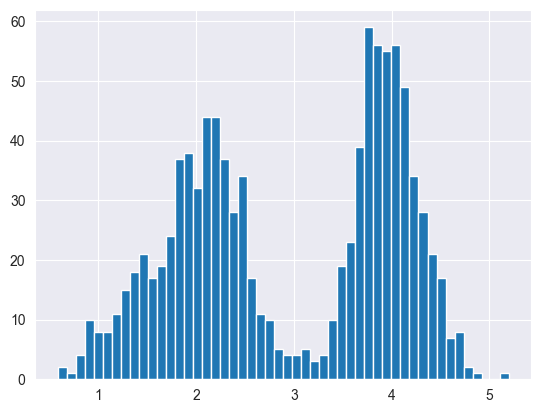

In [62]:
from hw2 import q3d

data = q3d(mus=[2,4], sigmas=[0.5, 0.3], ws=[0.5, 0.5])

plt.hist(data, bins=50)
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximately normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

Complete the functions in `hw2.py` to answer the following question.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [ ]:
from hw2 import q4a

X = q4a()

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [ ]:
from hw2 import q4b

X = q4b()

#### 4.C
What percent of people earn more than 85,000 RCU?

In [ ]:
from hw2 import q4c

X = q4c()

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [ ]:
from hw2 import q4d

X = q4d()

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types.


#### 5.A
Write code to compute the exact value of $E(T_{N})$

Complete the function `CC_Expected` in `hw2.py` to answer the following question.

In [ ]:
from hw2 import CC_Expected

CC_Expected()

#### 5.B
Write code to compute the exact value of $V(T_{N})$

Complete the function `CC_Variance` in `hw2.py` to answer the following question.

In [ ]:
from hw2 import CC_Variance

CC_Variance()

#### 5.C
Write code to exactly compute $P(T_{10}>30)$

Complete the function `CC_T_Steps` in `hw2.py` to answer the following question.

In [ ]:
from hw2 import CC_T_Steps

CC_T_Steps()

#### 5.D
Let $S_N$ denote the waiting time until $N$ different coupons are collected **twice**.

Write code to exactly compute $P(S_{10}>30)$

Complete the function `CC_S_Steps` in `hw2.py` to answer the following question.

In [ ]:
from hw2 import CC_S_Steps

CC_S_Steps()